In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('C:\\Users\\akhil\\Downloads\\Deep Learning_Projects\\seattle-weather.csv')

In [31]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [32]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [35]:
df.shape

(1461, 6)

In [36]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [37]:
training_set=df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [38]:
len(training_set)

1461

In [51]:
def df_to_XY(df,window_size=10):
    X_train=[]
    Y_train=[]
    for i in range(10,len(training_set)):
      X_train.append(training_set[i-10:i,0])
      Y_train.append(training_set[i,0])
    X_train,Y_train=np.array(X_train),np.array(Y_train)
    return X_train,Y_train


In [52]:
WINDOW=10
X,Y=df_to_XY(df,WINDOW)
print(len(X),len(Y))
X_train=X[:800]
Y_train=X[:800]
X_val=X[800:1000]
Y_val=Y[800:1000]
X_test=X[1000:]
Y_test=Y[1000:]

1451 1451


In [53]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [54]:
# build the rnn
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [55]:
regressor=Sequential()

In [56]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))


In [57]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [59]:
history=regressor.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 235.6123 - val_loss: 228.0536
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 96.8137 - val_loss: 153.3738
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 70.5373 - val_loss: 127.3923
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 59.3424 - val_loss: 110.6868
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 55.7847 - val_loss: 99.3495
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 54.6085 - val_loss: 91.0031
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 56.8111 - val_loss: 84.9111
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 54.4450 - val_loss: 81.9322
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 55.4472 - val_loss: 79.6328
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 55.2128 - val_loss: 78.2606
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 54.0250 - val_loss: 77.6330
Epoch 12/100
25/25 ━━━━━━

In [61]:
his=pd.DataFrame(history.history)

In [62]:
his.head()

,loss,val_loss
0,190.849304,228.053650
1,86.226349,153.373764
2,68.773567,127.392288
3,61.209183,110.686768
4,57.338203,99.349495


<Axes: title={'center': 'Loss&Val Loss'}>

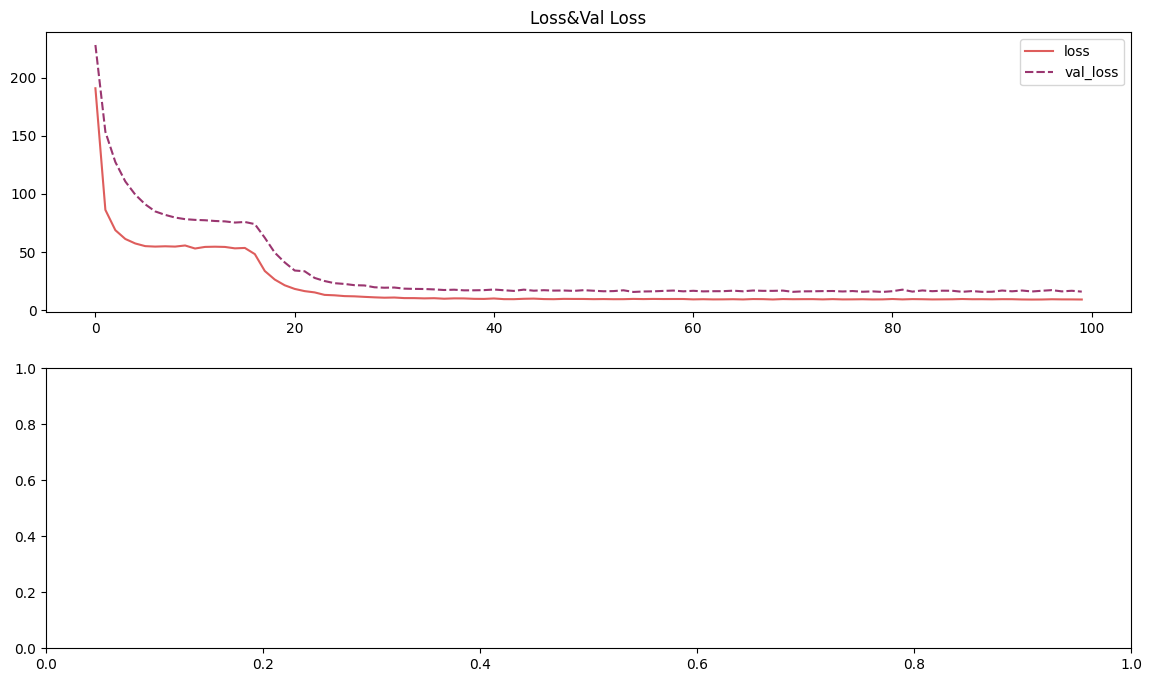

In [63]:
import seaborn as sns
his.columns
history_loss=his[['loss','val_loss']]
fig,axes=plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss&Val Loss")
sns.lineplot(history_loss,palette='flare')

In [64]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


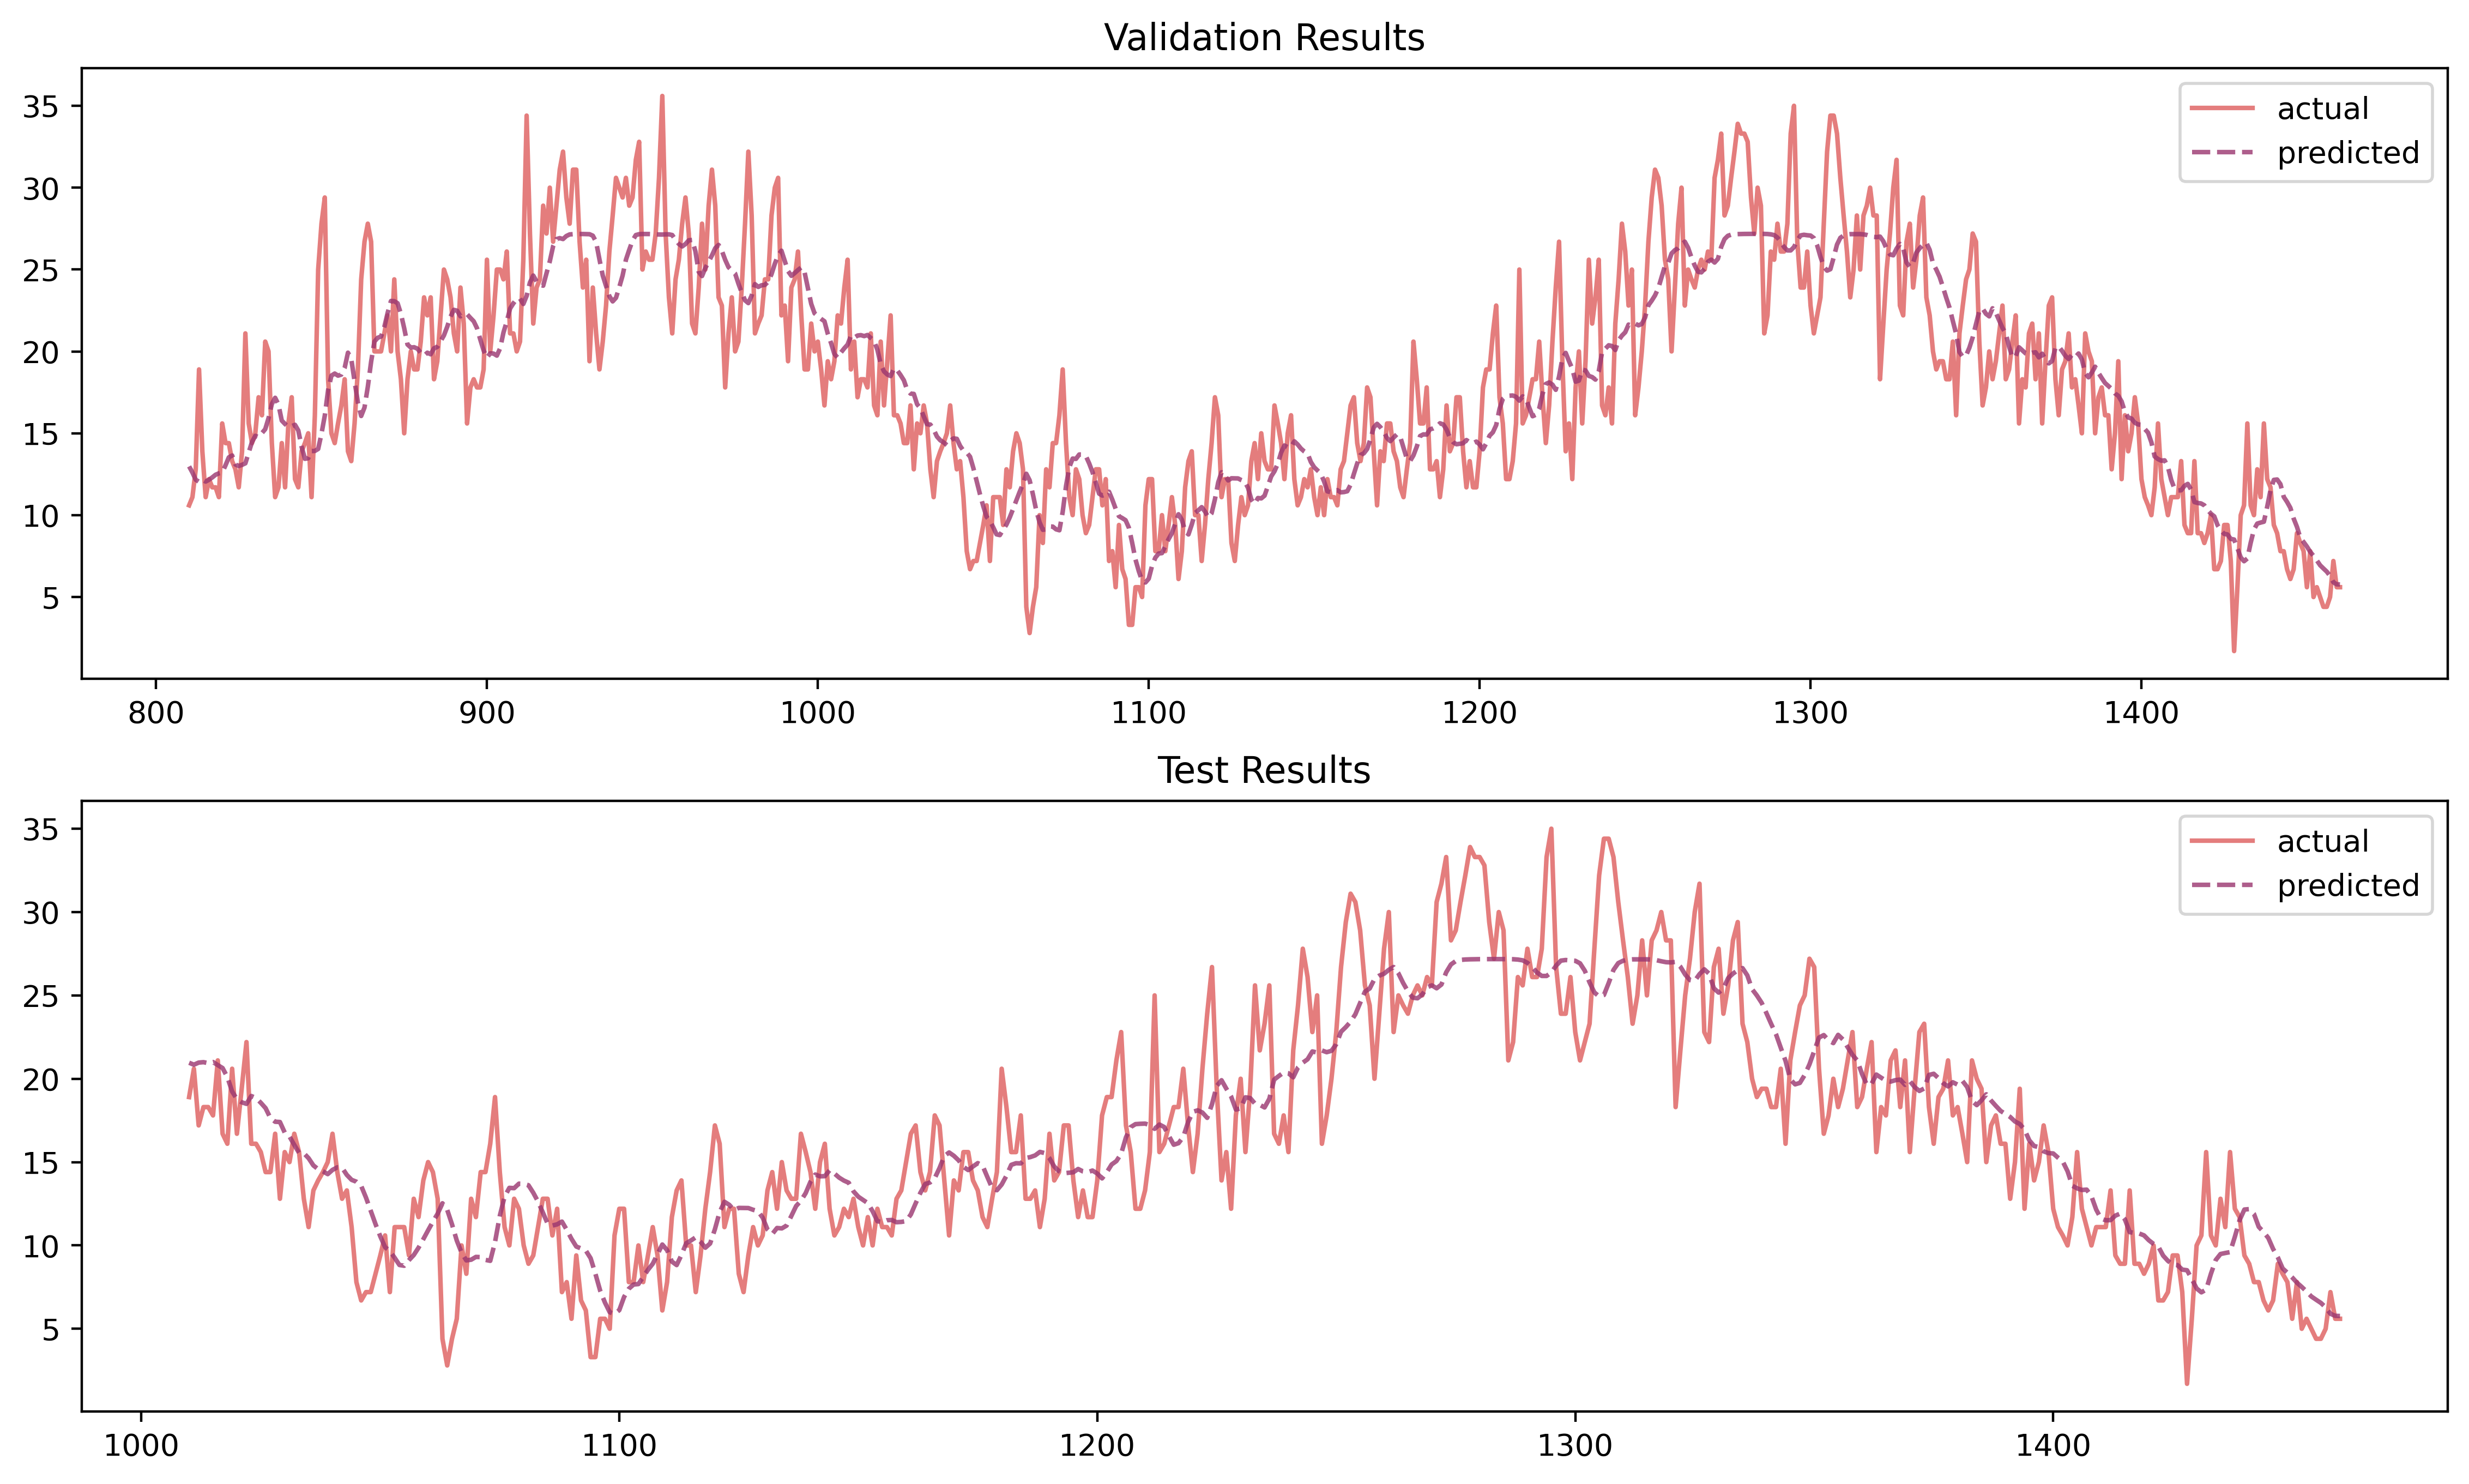

In [65]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);